In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random

In [2]:
def generating_function(x):
    a=1.80
    b=-4.05
    c=0.40
    d=1.0000
    xp = np.array(x)
    return a+b*xp+c*xp*xp+d*xp*xp*xp

def fitfunction(x,a,b,c,d):
    xp = np.array(x)
    return a+b*xp+c*xp*xp+d*xp*xp*xp


[ 1.80669643 -4.08857643  0.40127831  1.00559259]
[[ 2.54662579e-02  2.09094597e-03 -2.83714278e-03 -3.14240459e-04]
 [ 2.09094597e-03  1.29878852e-02 -6.65247288e-04 -1.16062809e-03]
 [-2.83714278e-03 -6.65247288e-04  5.73585395e-04  9.99775273e-05]
 [-3.14240459e-04 -1.16062809e-03  9.99775273e-05  1.24971917e-04]]
Chi^2 / dof = 1.812E+00 / 11
Fit Parameter 0: 1.807E+00 +/- 1.596E-01
0 1 6.322E+00
0 2 -1.942E+02
0 3 -9.874E+01
Fit Parameter 1: -4.089E+00 +/- 1.140E-01
1 2 -8.930E+01
1 3 -7.151E+02
Fit Parameter 2: 4.013E-01 +/- 2.395E-02
2 3 1.395E+03
Fit Parameter 3: 1.006E+00 +/- 1.118E-02


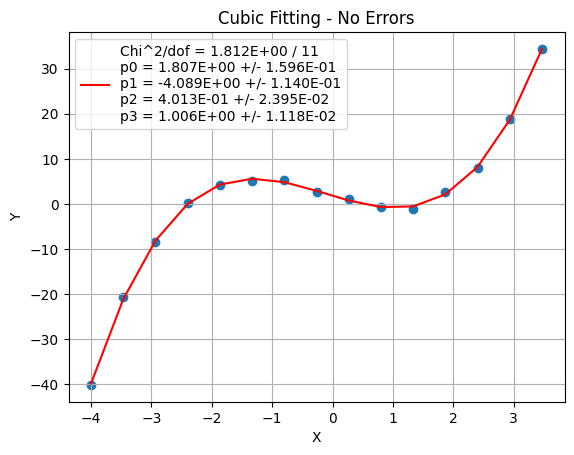

In [3]:

x = []
y = []
walk = [-1,1,-.5,.5,0,-1,1,-.5,.5,0,-1,1,-.5,.5,0]

npoints = 15

for i in range (0,npoints):
    x.append(float(-4.0+8.0*i/npoints))
    y.append(float(generating_function(x[i]))+float(0.5*walk[i]))

fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("Cubic Fitting - No Errors")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_yscale("linear")
ax1.grid(True)

ax1.scatter(x,y)

init_vals = [1.0,-1.0,1.0,1.0]
popt, pcov = curve_fit(fitfunction, x, y, p0=init_vals)

print (popt)

print (pcov)

yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(x[i],*popt))
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

param = []
rho = []
param.append(float(chi2))
param.append(npoints-len(init_vals))
for ii in range(0,len(init_vals)):
    param.append(float(popt[ii]))
    param.append(float(np.sqrt(pcov[ii][ii])))
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))
    for jj in range(0,len(init_vals)):
        rho.append(float(pcov[ii][jj])/float(pcov[ii][ii]*pcov[jj][jj]))
        if jj > ii:
            print("%d %d %.3E" % (ii,jj,rho[ii*len(init_vals)+jj]))

ax1.plot(x, fitfunction(x, *popt), 'r-', label = 'Chi^2/dof = %.3E / %d\np0 = %.3E +/- %.3E\np1 = %.3E +/- %.3E\np2 = %.3E +/- %.3E\np3 = %.3E +/- %.3E' % tuple(param))

leg = ax1.legend()
plt.show()